# Diagrama de control

Las gráficas de control son un método útil para determinar si un proceso está bajo control, y se utilizan ampliamente como una técnica de análisis y gestión de procesos.

In [2]:
import os, sys

try:
  os.chdir('../Python/QCKentei')
except:
  pass

sys.path.append(os.path.abspath(os.path.join("..","Common")))
path = os.getcwd()

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

import anova # type: ignore
import chart #type:ignore

## 05-01 Tipos de diagramas de control

### 1. Qué es un diagrama de control

El diagrama de control es una herramienta creada por W.A. Shewhatt para analizar y controlar la variabilidad de un proceso.

El objetivo en el control de calidad es eliminar de forma fiable las **causas asignables** y procurar un **estado de control estadístico** regido únicamente por **causas comunes**.

* Causas comunes: Variabilidad inevitable
* Causas asignables: Variabilidad que no se puede pasar por alto
* Estado de control estadístico: Para determinar si un proceso está en un estado de control estadístico, se asume que los datos siguen una distribución normal, lo que significa que el proceso transcurre sin cambios en la media y la desviación estándar.

### 2. Tipos de diagramas de control
* Diagrama de control de la media y el rango: Diagrama de control $ \bar{X}-R $
* Diagrama de control del la mediana y e rango: Diagrama de control $ Me-R $
* Diagrama de control de la media y el error estándar: Diagrama de control $ \bar{X}-s $
* Diagrama de control de los datos individuales y el rango móvil: Diagrama de control $ X - Rm $
* Diagrama de control de la tasa de defectos: Diagrama de control $ p $
* Diagrama de control del número de defectos: Diagrama de control $ np $
* Diagrama de control del número de defectos por unidad: Diagrama de control $ u $
* Diagrama de control del número de defectos: Diagrama de control $ c $

In [4]:
import gspread 
from google.oauth2.service_account import Credentials

SERVICE_ACCOUNT_FILE = "my-project-vscode-452201-249bdb033f8c.json"  # JSONファイルのパス
SCOPES = ["https://www.googleapis.com/auth/spreadsheets"]

credentials = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
client = gspread.authorize(credentials)

# スプレッドシートを開く（URLまたはスプレッドシートIDを使用）
SPREADSHEET_ID = "1W4H3VxXJwpKGMu0rE9ocz6yA6J0boG9vGzktgsro1es"
sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet11") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_records()
df = pd.DataFrame(list_of_lists)

df = df.set_index("n")
df = df.apply(pd.to_numeric, errors='coerce')

df100 = df.copy()

print("Tabla 5.2")

print(df100)

Tabla 5.2
        A     A2     A3    A4     D1     D2     D3     D4     d2     d3     E2
n                                                                             
2   2.121  1.880  2.659  1.88    NaN  3.686    NaN  3.267  1.128  0.853  2.659
3   1.732  1.023  1.954  1.19    NaN  4.358    NaN  2.575  1.693  0.888  1.772
4   1.500  0.729  1.628  0.80    NaN  4.698    NaN  2.282  2.059  0.880  1.457
5   1.342  0.577  1.427  0.69    NaN  4.918    NaN  2.114  2.326  0.864  1.290
6   1.225  0.483  1.287  0.55    NaN  5.078    NaN  2.004  2.534  0.848  1.184
7   1.134  0.419  1.182  0.51  0.205  5.469  0.076  1.924  2.704  0.833  1.109
8   1.061  0.373  1.099  0.43  0.387  5.394  0.136  1.864  2.847  0.820  1.054
9   1.000  0.337  1.032  0.41  0.546  5.307  0.184  1.816  2.970  0.808  1.010
10  0.949  0.308  0.975  0.36  0.687  5.203  0.223  1.777  3.078  0.797  0.975


In [5]:
import webbrowser

url = "https://docs.google.com/spreadsheets/d/" + SPREADSHEET_ID 
#webbrowser.open(url)

In [6]:
from logging import error

def get_cell_value(df, row_index, col_name):
    try:
        return df.loc[row_index, col_name]
    except KeyError as e:
        return f"No hay valor de: {e}"

## 05-02 Cómo elaborar un diagrama de control

### 1. Como eleborar un diagrama de contro $ \bar{X} - R $

Paso 1: Recoger los datos y agruparlos

Puntos clave para la agrupación:
1. Dentro de cada grupo, se debe buscar que la variabilidad se deba, en la medida de lo posible, únicamente a **causas comunes**.
2. La **variabilidad debida a causas asignable** debe manifestarse entre los grupos.
3. Normalmente, el tamaño del subgrupo $ n $ es de 2 a 5.

Paso 2: Calcular la media X y el rango R de cada grupo
* $ \bar{X} = \sum_{i=1}^n X_i / n $
* $ R = max(X_i) - min(X_i) $`

Paso 3: Calcular la media total $ \bar{\bar{X}} $ y el promedio del rango $ \bar{R} $

* $ \bar{\bar{X}} = \sum_{i=1}^n \bar{X}_i /k $
* $ \bar{R} = \sum R_i / k $
* $ k : $ Tamaño del subgrupo

Paso 4: Determinar las líneas de control

Límites de control de la gráfica X:
* Líena central: $ CL = \bar{X} $
* Límite de control superior (LCS): $ UCL = \bar{X} + A_2 \bar{R} $
* Límite de control inferior (LCI): $ LCL = \bar{X} - A_2 \bar{R} $

Límites de control de la gráfica R:
* Líena central: $ CL = \bar{R} $
* Límite de control superior (LCS): $ UCL = D_4 \bar{R} $
* Límite de control inferior (LCI): $ LCL = D_3 \bar{R} $

### 2. Diagrama de control de la mediana y el rango (Diagrama $ Me-R $)

La gráfica de control de medianas (Me) es una variación de la gráfica $ \bar{X} - R $, donde la $ \bar{X} $ (media) se sustituye por la $ Me $ (mediana), y presenta las siguientes características.

1. Se puede reducir el impacto de los valores atípicos dentro del grupo.
2. Si el tamaño del grupo es impar, no es necesario calcular Me, lo que lo hace más sencillo.
3. En comparación con el diagrama de control $ \bar{X} $, la tasa de detección es peor.


* Líena central: $ CL = \bar{Me} $
* Límite de control superior (LCS): $ UCL = \bar{M2} + A_4 \bar{R} $
* Límite de control inferior (LCI): $ LCL = \bar{Me} - A_4 \bar{R} $


## 5.1

ある製品の特性Xのデータの $ M_e - R $管理図の中心線と管理限界を求めよ。$ \bar{M_e} = 21.0 $, $ \bar{R} = 4.3 $、群の大きさは $ n=3 $ データは正規分布に従うとする。

Para los datos de la característica $ X $ de un producto, calcula la línea central y los límites de control del diagrama de control $ M_e - R $, $ \bar{M_e}=21.0 $, $ \bar{R}=4.3 $ el tamaño del grupo es $ n=3 $, y se asume que los datos siguen una distribución normal


Límites de control de la gráfica Me:

Líena central: $ CL = \bar{Me} = 21.0 $

Límite de control superior (LCS): $ UCL = \bar{M2} + A_4 \bar{R}  = 26.1 $

Límite de control inferior (LCI): $ LCL = \bar{Me} - A_4 \bar{R} = 15.9 $

Límites de control de la gráfica R:

Líena central: $ CL = \bar{R} = 4.3 $

Límite de control superior (LCS): $ UCL = D_4 \bar{R} = 11.1  $

Límite de control inferior (LCI): $ LCL = D_3 \bar{R} = NA $

Diagrama de control Me:
Línea central (CL): 21.0
Límite superior (UCL): 26.1
Límite inferior (LCL): 15.9

Diagrama de control R:
Línea central (CL): 4.3
Límite superior (UCL): 11.1
Límite inferior (LCL): 0.0


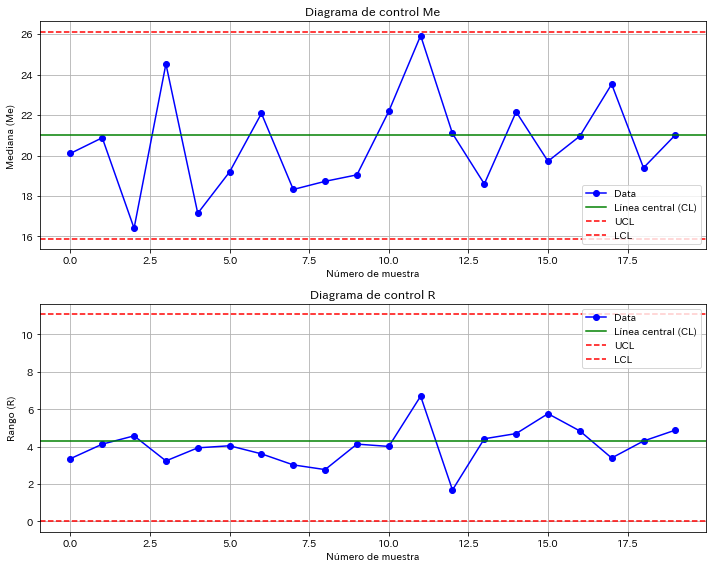

In [7]:
# Datos proporcionados
mean_me = 21.0
mean_r = 4.3
n = 3

# Constantes de control
A4 = get_cell_value(df100,n,'A4')
D4 = get_cell_value(df100,n,'D4')
D3 = 0

# Cálculo del diagrama de control Me
cl_me = mean_me
ucl_me = mean_me + A4 * mean_r
lcl_me = mean_me - A4 * mean_r

# Cálculo del diagrama de control R
cl_r = mean_r
ucl_r = D4 * mean_r
lcl_r = D3 * mean_r

# Mostrar los resultados
print("Diagrama de control Me:")
print(f"Línea central (CL): {cl_me}")
print(f"Límite superior (UCL): {ucl_me:.1f}")
print(f"Límite inferior (LCL): {lcl_me:.1f}")

print("\nDiagrama de control R:")
print(f"Línea central (CL): {cl_r}")
print(f"Límite superior (UCL): {ucl_r:.1f}")
print(f"Límite inferior (LCL): {lcl_r:.1f}")

# Datos de muestra (generación de datos ficticios)
np.random.seed(2)
sample_me = np.random.normal(loc=mean_me, scale=mean_r / 2, size=20)
sample_r = np.random.normal(loc=mean_r, scale=mean_r / 4, size=20)

# Creación del gráfico
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Diagrama de control Me
ax[0].plot(sample_me, marker='o', linestyle='-', color='b', label='Data')
ax[0].axhline(y=cl_me, color='g', linestyle='-', label='Línea central (CL)')
ax[0].axhline(y=ucl_me, color='r', linestyle='--', label='UCL')
ax[0].axhline(y=lcl_me, color='r', linestyle='--', label='LCL')
ax[0].set_title("Diagrama de control Me")
ax[0].set_xlabel("Número de muestra")
ax[0].set_ylabel("Mediana (Me)")
ax[0].legend()
ax[0].grid()

# Diagrama de control R
ax[1].plot(sample_r, marker='o', linestyle='-', color='b', label='Data')
ax[1].axhline(y=cl_r, color='g', linestyle='-', label='Línea central (CL)')
ax[1].axhline(y=ucl_r, color='r', linestyle='--', label='UCL')
ax[1].axhline(y=lcl_r, color='r', linestyle='--', label='LCL')
ax[1].set_title("Diagrama de control R")
ax[1].set_xlabel("Número de muestra")
ax[1].set_ylabel("Rango (R)")
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()

## 05-03 Teoría de los diagramas de control

### 1. Cálculo de las líneas de control en el diagrama $ \bar{X}-R $

En los diagramas de control, se establecen límites de control como criterio de juicio para determinar si el proceso está en estado de control. Cálculo de los límites de control.

$ (medio) \pm 3 \times (desviación \cdot estándar)$

A este tipo de diagrama de control se llama **diagrama de control de tres sigmas**.

### 2. Determinación del estado de control estadístico

El estado de control estadístico se refiere a cuando el proceso está influenciado solo por causas aleatorias

Para determinar si un proceso está en un **estado de control estadístico a partir de una gráfica de control, se utilizan los siguientes criterios:
1. Ningún punto está fuera de los límites de control.
2. La disposición y dispersión de los puntos no presentan patrones inusuales.

### 3. Vaiabilidad **intragrupo** y Variabilidad **itergrupo**.

En las gráficas de control, la variabilidad de los datos se puede dividir en variación intragrupo y variación intergrupo.

$ \sigma_{\bar{x}}^2 = \sigma_w^2 + \sigma_b^2 / n \qquad (\sigma_{x}^2 = \sigma_w^2 + \sigma_b^2)$

De esta manera, $ \bar{X} $ se ve influenciada tanto por la variación intergrupal como por la variación intragrupal.

Así, si se logra agrupar de modo que la variabilidad debida a causas comunes quede dentro de los grupos, y la magnitud de esta variación sea constante, entonces la variación $ \bar{X} $ se manifestará como variación intergrupal debida a causas asignables.

La agrupación es un paso crucial en el proceso de creación de gráficas de control. A partir de estas gráficas, es posible discernir qué tipo de variabilidad (intragrupo o intergrupo) está presente.

Además, en muchos casos, la estratificación puede proporcionar información útil, permitiendo a veces determinar la agrupación más adecuada.



### 4. Estimación de los componentes de varianza en los datos de un experimento de anidamiento

Cuando se construye una gráfica de control a partir de datos obtenidos mediante un experimento de anidamiento (o branched experimento), que consiste en muestrear $ m $ unidades del $ l $ lotes de un cierto producto y realizar $ n $ mediciones, es posible estimar los componentes de la varianza de la característica X del producto, dependiendo de cómo se lijan los subgrupos.

1. Error de medición:
* $ \hat{\sigma}_M^2 = (\bar{R}_{ij}/d_2)^2 $
* $ \bar{R}_{ij} $ : El promedio de los rangos cuando cada muestra individual se considera un subgrupo.

2. Error de muestreo:
* $ \hat{\sigma}_S^2 = (\bar{R}_i /d_2)^2 - \frac{1}{n} \hat{\sigma}_M^2 $
* $ \bar{R}_i $: La media cuando un lote individual se considera un subgrupo.

3. Variación entre lotes:
* $ \hat{\sigma}_L^2 = V - \frac{1}{m} \hat{\sigma}_S^2 - \frac{1}{mn} \hat{\sigma}_M^2 $
* $ V $: Varianza calculada a partir de todos los datos

## 5.2

ある製品の特性Xを生産日毎に午前と午後２回ずつ測定し、表５．３のデータを得た。
1. 生産日をひとつの群とした場合
2. 午前（X1,X2）、午後（X3,X4）をひとつの群とした場合の

Xbar-R管理図を作成したときの、郡内変動と群間変動を求めよ。

Se obtuvieron los datos de las características X de un producto mediante mediciones dos veces al día, una por la mañana y otra por la tarde, para cada día de producción según la Tabla 5.3.
1. Cuando el día de producción se considera como un solo grupo.
2. Cuando la mañana (X2, X2) y la tarde (X3, X4) se consideran como un solo grupo.

Calcule la variabilidad dentro del grupo y la variabilidad entre grupos al crear el gráfico de control Xbar-R.

In [8]:
import gspread 
from google.oauth2.service_account import Credentials

# 認証情報の設定
SERVICE_ACCOUNT_FILE = "my-project-vscode-452201-249bdb033f8c.json"  # JSONファイルのパス
SCOPES = ["https://www.googleapis.com/auth/spreadsheets"]

credentials = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
client = gspread.authorize(credentials)

# スプレッドシートを開く（URLまたはスプレッドシートIDを使用）
SPREADSHEET_ID = "1RkO0VL4WR6cbPBfBEjz693Lo4SdUAoSvRHV491ggXTo"

sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet10") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()
df = pd.DataFrame(list_of_lists)

df.columns = df.iloc[0]
df = df.drop(index=0)
df = df.set_index(df.columns[0])
df = df.astype(float)

df.to_excel("Data_1/Tabla_5_3.xlsx")

display(df)


,X1,X2,X3,X4
Date,,,,
1-Sep,20.0,23.0,25.0,24.0
2-Sep,19.0,18.0,23.0,25.0
3-Sep,24.0,24.0,26.0,23.0
4-Sep,23.0,20.0,25.0,23.0
5-Sep,17.0,19.0,18.0,21.0
6-Sep,26.0,23.0,21.0,20.0
7-Sep,20.0,20.0,24.0,26.0
8-Sep,20.0,21.0,23.0,24.0
9-Sep,21.0,24.0,23.0,26.0


#### 1. Cuando el día de producción se considera como un solo grupo.

$ \bar{X} = \frac{1}{N} \sum X_i = 22.717 $

$ \bar{R} = \frac{1}{k} \sum R = 5.200 $

$ \hat{\sigma} x^2 = \frac{1}{N-1} \bigl(\sum x_i^2 - \frac{1}{N} (\sum x)^2 \bigr) = 7.088 $

Variación intragrupo:

$ \hat{\sigma}_w = \bar{R} d_2 = 2.525 $

Variación intergrupo:

$ \hat{\sigma}_b = \sqrt{\hat{\sigma}_{x}^2 - \hat{\sigma}_{w}^2} = 0.842 $


In [9]:
df2 = df.copy()

df["group"] = range(1, len(df)+1)
df.set_index("group", inplace=True)

# Calcular la media (Xbar) y el rango (R)
df["Xbar"] = df.mean(axis=1)
df["R"] = df.max(axis=1) - df.min(axis=1)

print("Tabla 5.3 Datos de la característica X")
display(df)

Tabla 5.3 Datos de la característica X


,X1,X2,X3,X4,Xbar,R
group,,,,,,
1,20.0,23.0,25.0,24.0,23.00,5.0
2,19.0,18.0,23.0,25.0,21.25,7.0
3,24.0,24.0,26.0,23.0,24.25,3.0
4,23.0,20.0,25.0,23.0,22.75,5.0
5,17.0,19.0,18.0,21.0,18.75,4.0
6,26.0,23.0,21.0,20.0,22.50,6.0
7,20.0,20.0,24.0,26.0,22.50,6.0
8,20.0,21.0,23.0,24.0,22.00,4.0
9,21.0,24.0,23.0,26.0,23.50,5.0


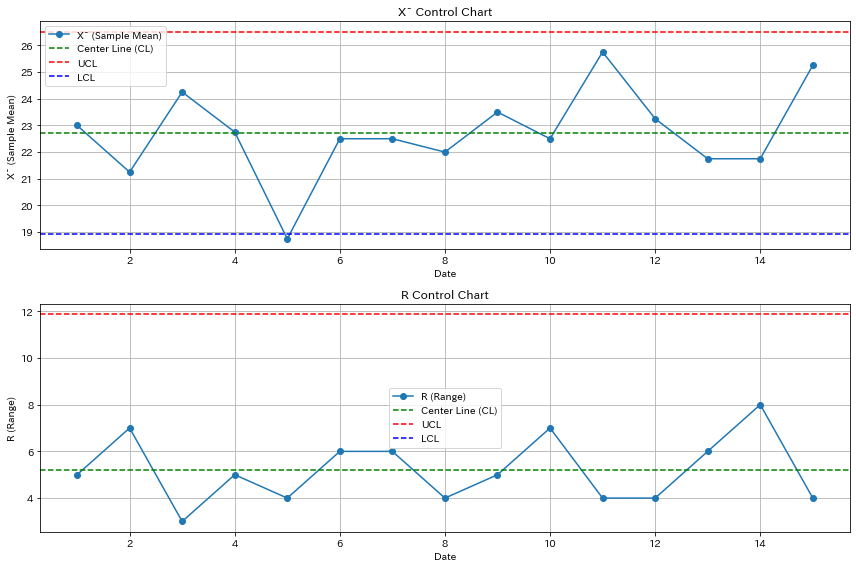

Within-group variation (WV): 2.525
Between-group variation (BV): 0.842


In [10]:
# En el caso de los constantes de control (n=4)
n = 4

A2 = get_cell_value(df100,n,'A2')
D3 = get_cell_value(df100,n, 'D3')
D4 = get_cell_value(df100,n,'D4')
d2 = get_cell_value(df100,n,'d2')

# Calcular los límites de control
Xbar_bar = df["Xbar"].mean()  # Línea central del gráfico de medias (Xbar)
R_bar = df["R"].mean()        # Línea central del gráfico de rango (R)

df["Xbar_UCL"] = Xbar_bar + A2 * R_bar
df["Xbar_LCL"] = Xbar_bar - A2 * R_bar
df["R_UCL"] = D4 * R_bar
df["R_LCL"] = D3 * R_bar

# Crear gráfico
plt.figure(figsize=(12, 8))

# Gráfico de medias (Xbar)
plt.subplot(2, 1, 1)
plt.plot(df.index, df["Xbar"], marker="o", label="X̄ (Sample Mean)")
plt.axhline(Xbar_bar, color="green", linestyle="--", label="Center Line (CL)")
plt.axhline(df["Xbar_UCL"].iloc[0], color="red", linestyle="--", label="UCL")
plt.axhline(df["Xbar_LCL"].iloc[0], color="blue", linestyle="--", label="LCL")
plt.title("X̄ Control Chart")
plt.xlabel("Date")
plt.ylabel("X̄ (Sample Mean)")
plt.legend()
plt.grid()

# Gráfico de rango (R)
plt.subplot(2, 1, 2)
plt.plot(df.index, df["R"], marker="o", label="R (Range)")
plt.axhline(R_bar, color="green", linestyle="--", label="Center Line (CL)")
plt.axhline(df["R_UCL"].iloc[0], color="red", linestyle="--", label="UCL")
plt.axhline(df["R_LCL"].iloc[0], color="blue", linestyle="--", label="LCL")
plt.title("R Control Chart")
plt.xlabel("Date")
plt.ylabel("R (Range)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Calcule la variabilidad dentro del grupo y la variabilidad entre grupos
wv = df['R'].mean()/d2 # Within-group variation
xt = np.var(df.iloc[:,:4].to_numpy().flatten(), ddof=1) # Varianza de todos los datos
bv = np.sqrt(xt - wv**2) # Between-group variation

print(f"Within-group variation (WV): {wv:.3f}")
print(f"Between-group variation (BV): {bv:.3f}")


#### 2. Cuando la mañana (X2, X2) y la tarde (X3, X4) se consideran como un solo grupo.

$ \bar{X} = \frac{1}{N} \sum X_i = 22.717 $

$ \bar{R} = \frac{1}{k} \sum R = 2.033 $

Variación intragrupo:

$ \hat{\sigma}_w = \bar{R} d_2 = 1.803 $

Variación intergrupo:

$ \hat{\sigma}_b = \sqrt{\hat{\sigma}_{x}^2 - \hat{\sigma}_{w}^2} = 1.959 $

In [11]:
# Convertir a 30 filas y 2 coumnas
flattened = df2.values.flatten()

# Ajustar la cantidad de datos para que sea un número par
if len(flattened) % 2 != 0:
    flattened = np.append(flattened, np.nan)  # En caso de ser un número impar, añadir NaN al final

df3 = pd.DataFrame(flattened.reshape(-1, 2), columns=['X1', 'X2'])

df3["group"] = range(1, len(df3)+1)
df3.set_index("group", inplace=True)

# Calcular la media (Xbar) y el rango (R)
df3["Xbar"] = df3.mean(axis=1)
df3["R"] = df3.max(axis=1) - df3.min(axis=1)

print("Tabla 5.3 Datos de la característica X")
display(df3)

Tabla 5.3 Datos de la característica X


,X1,X2,Xbar,R
group,,,,
1,20.0,23.0,21.5,3.0
2,25.0,24.0,24.5,1.0
3,19.0,18.0,18.5,1.0
4,23.0,25.0,24.0,2.0
5,24.0,24.0,24.0,0.0
6,26.0,23.0,24.5,3.0
7,23.0,20.0,21.5,3.0
8,25.0,23.0,24.0,2.0
9,17.0,19.0,18.0,2.0


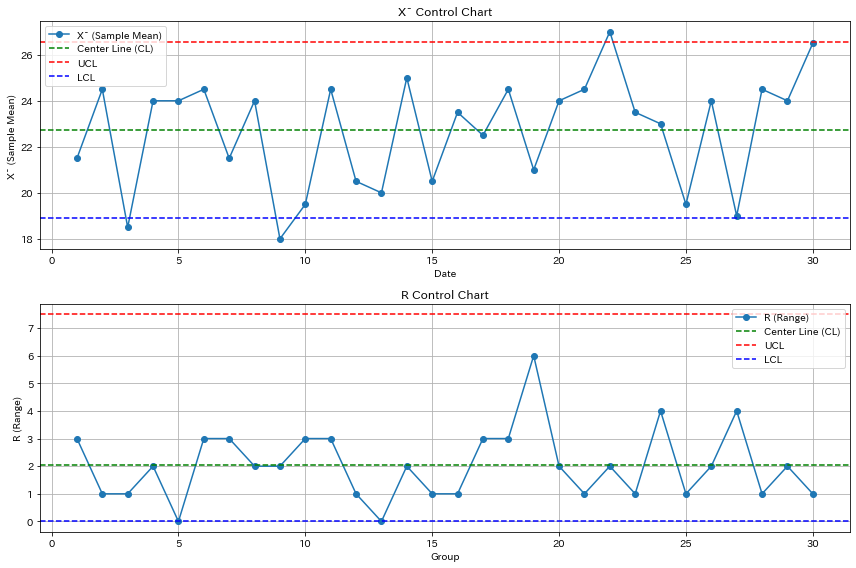

Within-group variation (WV): 1.803
Between-group variation (BV): 1.959


In [12]:
# En el caso de los constantes de control (n¿2)
A2 = 1.880  # Para el fráfico de medias (Xbar)
D3 = 0      # Para el límite de control inferior del gráfico de rango (R)
D4 = 3.686  # Para el límite de control superior del gráfico (R)
d2 = 1.128  # Para la corrección de la variabilidad dentro del grupo

# Calucular los límites de control
Xbar_bar = df3["Xbar"].mean()  # Línea central del gráfico de medias (Xbar)
R_bar = df3["R"].mean()        # Línea central del gráfico de rango(R)

df3["Xbar_UCL"] = Xbar_bar + A2 * R_bar
df3["Xbar_LCL"] = Xbar_bar - A2 * R_bar
df3["R_UCL"] = D4 * R_bar
df3["R_LCL"] = D3 * R_bar

# Crear gáficos
plt.figure(figsize=(12, 8))

# Gráfico de medias (Xbar)
plt.subplot(2, 1, 1)
plt.plot(df3.index, df3["Xbar"], marker="o", label="X̄ (Sample Mean)")
plt.axhline(Xbar_bar, color="green", linestyle="--", label="Center Line (CL)")
plt.axhline(df3["Xbar_UCL"].iloc[0], color="red", linestyle="--", label="UCL")
plt.axhline(df3["Xbar_LCL"].iloc[0], color="blue", linestyle="--", label="LCL")
plt.title("X̄ Control Chart")
plt.xlabel("Date")
plt.ylabel("X̄ (Sample Mean)")
plt.legend()
plt.grid()

# Gráfico de rango (R)
plt.subplot(2, 1, 2)
plt.plot(df3.index, df3["R"], marker="o", label="R (Range)")
plt.axhline(R_bar, color="green", linestyle="--", label="Center Line (CL)")
plt.axhline(df3["R_UCL"].iloc[0], color="red", linestyle="--", label="UCL")
plt.axhline(df3["R_LCL"].iloc[0], color="blue", linestyle="--", label="LCL")
plt.title("R Control Chart")
plt.xlabel("Group")
plt.ylabel("R (Range)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Calcule la variabilidad dentro del grupo y la variabilidad entre grupos
wv = df3['R'].mean()/d2 # Within-group variation
xt = np.var(df3.iloc[:,:2].to_numpy().flatten(), ddof=1) # Varianza de todos los datos
bv = np.sqrt(xt - wv**2) # Between-group variation

print(f"Within-group variation (WV): {wv:.3f}")
print(f"Between-group variation (BV): {bv:.3f}")

## 05-04 Índice de capacidad del proceso

### 1. Qué es el índice de capacidad del proceso

El índice de capacidad del proceso es un indicador que mide la capacidad cualitativa del proceso para producir productos. Se utilizan los índices de capacidad del proceso $ C_p $ y $ C_{pk} $, que se calculan a partir de la relación entre la variabilidad del proceso y el rango de las especificaciones del producto.

### 2. Cómo calcular el índice de capacidad del proceso

Índice de capacidad del proceso para especificaciones bilaterales

$ C_p = \frac{S_u - S_L}{6 \sigma} $

En el caso de solo límite superior de especificación:

$ C_p = \frac{S_U - \bar{X}}{3\sigma}$

En el caso de solo límite inferior de especificación:

$ C_p = \frac{\bar{X}-S_L}{3\sigma} $

Índice de capacidad del proceso considerando el sesgo:

El menor de los dos

$ C_p = \frac{S_U - \bar{X}}{3\sigma}$,  $  C_p = \frac{\bar{X}-S_L}{3\sigma} $

### 3. La evaluación del índice de capacidad del proceso

Generalmente, si $ C_p \gt 1.33 $, se considera que la capacidad del proceso es suficiente.

## 5.3

上限規格Su=100、下限規格SL=40の製品において、データの平均値Xbar=80、標準偏差s=7.0であった。CpとCpkの値を求めよ。データは、正規分布に従うとする。

Dado un producto con un límite superior de especificación $ S_U = 100 $ y un límite inferior de especificación $ S_L = 40 $, se obtuvo que la media de los datos es $ \bar{x} = 80 $ y la desviación estándar es $ s = 7.0 $. Calcule los valores de $ C_p $ y $ C_{pk} $, asumiendo que los datos siguen una distribución normal.


$ C_p = \frac{S_U - S_L}{6_S}  = 1.43 $

$ C_{pk} \frac{S_U - \bar{x}}{3_S} = 0.95 $

El valor de Cp es suficiente, pero el valor de Cpk es insuficiente. En este caso, no hay porblama con la variabilidad, sino con la media.

In [13]:
# Confiburación de los valores: l´mite superior de especificación Su、
# límite inferior de especificación SL、valor promedio Xbar、y desviación s
Su = 100  # Límite superior de especificación
SL = 40   # Límite inferior de especificación
Xbar = 80 # Valor promedio
s = 7.0   # Desviación estándar

# Cálculo de Cp
Cp = (Su - SL) / (6 * s)

# Cálculo de Cpk
Cpu = (Su - Xbar) / (3 * s)  # Límite superior
Cpl = (Xbar - SL) / (3 * s)  # Límite inferior
Cpk = min(Cpu, Cpl)

# Visualización de los resultados
print(f"Cp: {Cp:.2f}")
print(f"Cpk: {Cpk:.2f}")


Cp: 1.43
Cpk: 0.95


### 4. Hasta ahora, hemos tratado el índice de capacidad del proceso $ C_p $ como un estadístico. Sin embargo, si lo consideramos un parámetro, entoces $ C_p = \frac{S_U - S_L} {6 \sigma } $. No obstante, dado que la varianza poblacional $ \sigma^2 $ es generalmente desconocida, se reemplaza por el estadístico de la desviación estándar $ s $.

Dado que el índice de capacidad del proceso calculado utilizando la desviación estándar $ s $ es un valor estimado, cuando el número de datos es pequeño, en ocasiones se realiza una estimación por intervalos y el índice de capacidad del proceso se estima a partir de su límite inferior de confianza.

Además, en el caso de $ C_p $ para especificaciones unilaterales o $ C_{pk} $ que considera el sesgo, se utiliza la media $ \bar{X} $ como estadístico adicional a la desviación estándar $ s $, lo que hace que la estimación por intervalos sea más compleja.


Intervalo de confianza del $ 100(1-\alpha) $% para el índice de capacidad del proceso $ C_p $:

1. Para especificaciones bilaterales:
* Límite superior de confianza
  * $ \hat{C}_p \sqrt{\frac{\chi^2(n-1, \alpha/2)}{n-1}}$
* Límite inferior de confianza
  * $ \hat{C}_p \sqrt{\frac{\chi^2(n-1, 1-\alpha/2)}{n-1}}$

2. Para especificaciones unilaterales:
* Límite superior de confianza
  * $ \hat{C}_p + u(\alpha)\sqrt{\frac{\hat{C}_p^2}{2(n-1)}+ \frac{1}{9n}} $
* Límite inferior de confianza
  * $ \hat{C}_p - u(\alpha)\sqrt{\frac{\hat{C}_p^2}{2(n-1)}+ \frac{1}{9n}} $

Intervalo de confianza del $ 100 (1-\alpha) $% para el índice de capacidad del proceso $ C_{pk} $, considerando el sesgo:
* Límite superior de confianza
  * $ \hat{C}_{pk} + u(\alpha)\sqrt{\frac{\hat{C}_{pk}^2}{2(n-1)}+ \frac{1}{9n}} $
* Límite inferior de confianza
  * $ \hat{C}_{pk} - u(\alpha)\sqrt{\frac{\hat{C}_{pk}^2}{2(n-1)}+ \frac{1}{9n}} $

## 5.4

上限規格 $ S_U = 100 $、下限規格 $ S_L = 40 $のある製品において、１０個のデータを取ったところ、平均値 $ \bar{x} = 70 $、標準偏差 $ s=7.5 $ であることが分かった。$ C_p $の値と95%信頼区間を求めよ。データは、正規分布に従うとする。

En un producto con un límite superior de especificación $ S_u = 100 $ y un límite inferior de especificación $ S_L = 40 $, se toman 10 datos, y se encontró que el valor promedio es $ \bar{x} = 70 $ y la desviación estándar es $ s = 7.5 $. Calcule el valor de $ C_p $ y el intervalo de confianza del 95%. Se asume que los datos siguen una distribución normal.


Paso 1: Cálculo de Cp

$ \hat{C}_p = \frac{S_u - S_L}{6s}  = 1.33 $

Paso 2: Cálculo de los límites de confianza de Cp

$ \hat{C}_p \sqrt{\frac{\chi^2(n-1, 1 - \alpha/2)}{n-1}} < C_p < \hat{C}_p \sqrt{\frac{\chi^2(n-1, \alpha/2)}{n-1}}$

$ 0.73 < C_p < 1.93 $

In [14]:
import scipy.stats as stats
import math

# Limites superior e inferior de especificación
Su = 100  # Límite superior de especificación
SL = 40   # Límite inferior de especificación

# Valor promedio y desviación estándar de los datos
Xbar = 70  # Valor promedio
s = 7.5    # Desviación estándar
n = 10     # Númer de datos

# Cálculo de Cp
Cp = (Su - SL) / (6 * s)

# Cálculo del intervalo de confianza del 95% para la varianza
alpha = 0.05
chi2_lower = stats.chi2.ppf(1 - alpha / 2, df=n - 1)  # Valor superior de χ²
chi2_upper = stats.chi2.ppf(alpha / 2, df=n - 1)      # Valor crítico inferior de χ²

# Intervalo de confianza para la desviación estándar
# (calculado a partir de intervalo de confianza para la varianza)
variance_lower = ((n - 1) * s**2) / chi2_lower
variance_upper = ((n - 1) * s**2) / chi2_upper
stddev_lower = variance_lower**0.5
stddev_upper = variance_upper**0.5

# Cálculo del intervalo de confianza para Cp
Cp_lower = (Su - SL) / (6 * stddev_upper)
Cp_upper = (Su - SL) / (6 * stddev_lower)

# Visualización de los resultados
print(f"Cp: {Cp:.2f}")
print(f"Intervalo de confianza del 95%: ({Cp_lower:.2f}, {Cp_upper:.2f})")


Cp: 1.33
Intervalo de confianza del 95%: (0.73, 1.94)


## 5.5

下限規格が $ S_L = 40 $の製品において、10個のデータを取ったところ、平均値 $ \bar{x}=70 $、標準偏差 $ s=7.5 $であることが分かった。$ C_p $ の値と９５％信頼区間を求めよ。データは正規分布に従うとする。

Para un producto con un límite inferior de especificación $ S_L = 40 $, se toman 10 datos y se encontró que el valor promedio $ \bar{x} = 70 $ y la desviación estándar $ s = 7.5 $. Calcule el valor de $ C_p $ y su intervalo de confianza del 95%. Se supone que los datos siguen una distribución normal.


Paso 1: Cálculo de Cp

$ \hat{C}_p = \frac{\bar{x} - S_L}{3s}  = 1.33 $

Paso 2: Cálculo de los límites de confianza de Cp

* Límite superior de confianza:

  * $ \hat{C}_p + u(\alpha)\sqrt{\frac{\hat{C}_p^2}{2(n-1)}+ \frac{1}{9n}} = 1.87 $

* Límite inferior de confianza:

  * $ \hat{C}_p - u(\alpha)\sqrt{\frac{\hat{C}_p^2}{2(n-1)}+ \frac{1}{9n}} = 0.79 $

* $ 0.79 < C_p < 1.87 $

In [15]:
import scipy.stats as stats

# Límite inferior de especificación
SL = 40

# Promedio、desviación estándar、tamaño de la muestra de los datos
Xbar = 70  # Promedio
s = 7.5    # Desviación estándar
n = 10     # Tamaño de la muestra

# Cálculo de Cp（en el caso de solo el límite inferior de especificacion）
Cp = (Xbar - SL) / (3 * s)

# Valor z
z = stats.norm.ppf(0.95)

# Cálculo de la varianza de Cp （considerando la varianza de Cp en sí）
Cp_variance = (Cp ** 2) / (2*(n - 1)) + (1 / (9 * n))

# Cálculo del ancho del intervalo de confianza de Cp
Cp_conf_interval_width = z * np.sqrt(Cp_variance)

# Intervalo de confianza de Cp
Cp_lower = Cp - Cp_conf_interval_width
Cp_upper = Cp + Cp_conf_interval_width

# Mostrar resultados
print(f"Cp: {Cp:.2f}")
print(f"Intervalo de confianza de 95%: ({Cp_lower:.2f}, {Cp_upper:.2f})")


Cp: 1.33
Intervalo de confianza de 95%: (0.79, 1.88)


Cpの信頼区間を導出する際、多くの文献や品質管理の教科書では、$ Var(C_p) = C_p^2 \cdot \frac{2}{n-1} + \frac{1}{9n} $が採用されている

Al derivar el intervalo de confianza de Cp, muchos documentos y libros de texto de control de calidad adoptan la fórmula
$ Var(C_p) = C_p^2 \cdot \frac{2}{n-1} + \frac{1}{9n} $

In [16]:
# Límite inferior de especificación
SL = 40  #

# Promedio, desviación estándar, tamaño de la muestra de los datos
Xbar = 70  # Promedio
s = 7.5    # Desviación estándar
n = 10     # Tamaño de la muestra

# Valor Z
z = stats.norm.ppf(0.95)

# Cálculo de Cp（en el caso de solo el límite inferior de especificación）
Cp = (Xbar - SL) / (3 * s)

# Cálculo de la varianza de Cp（）
Cp_variance = (Cp ** 2) * (2 / (n - 1)) + (1 / (9 * n))

# Cálculo del ancho del intervalo de confianza de Cp
Cp_conf_interval_width = z * np.sqrt(Cp_variance)

# Intervalo de confianza de Cp
Cp_lower = Cp - Cp_conf_interval_width
Cp_upper = Cp + Cp_conf_interval_width

# Mostrar resultados
print(f"Cp: {Cp:.2f}")
print(f"Intervalo de confianza del 95%: ({Cp_lower:.2f}, {Cp_upper:.4f})")


Cp: 1.33
Intervalo de confianza del 95%: (0.29, 2.3816)


χ二乗分布を使う方が適している場合：
* 標本分散や標準偏差に関する信頼区間を求める場合に有効
* データが正規分布に従う場合に適用可能で、分散の不確実性を直接反映できる
* 信頼区間をより厳密に求めたい場合に有用

分散補正式を使う方法が適している場合：
* Cpの信頼区間を求める場合、特にサンプルサイズが小さい場合に有効
* よりシンプルで計算が早く、特に品質管理での実務的な目的には適している

Uso de la distribución $ \chi^2 $ es adecuado cuando:
* Es útil cuando se busca el intervalo de confianza de la varianza muestral o la desviación estándar.
* Se aplica cuando los datos siguen una distribución normal, ya que refleja directamente la incertidumbre de la varianza.
* Es útil cuando se desea obtener un intervalo de confianza más preciso.

Uso del método de corrección de la varianza es adecuado cuando:
* Es útil al calcular el intervalo de confianza de Cp, especialmente cuando el tamaño de la muestra es pequeño.
* Es más simple, rápido en los cálculos y especialmente adecuado para fines prácticos en el control de calidad.


In [17]:
# Datos de entrada
SL = 40      # Límite inferior de especificación
Xbar = 70    # Promedio
s = 7.5      # Desviación estándar
n = 10       # Tamaño de la muestra

# Cálculo de Cp
Cp = (Xbar - SL) / (3 * s)

# Cálculo del intervalo de confianza del 95% para la varianza
alpha = 0.05
df = n - 1  # Grado de libertad
chi2_lower = stats.chi2.ppf(1 - alpha / 2, df=df)  # Valor crítico superior de la distribución χ²
chi2_upper = stats.chi2.ppf(alpha / 2, df=df)      # Valor crítico inferior de la distribución χ²

# Intervalo de confianza para la varianza
variance_lower = ((n - 1) * s**2) / chi2_lower
variance_upper = ((n - 1) * s**2) / chi2_upper
stddev_lower = variance_lower**0.5
stddev_upper = variance_upper**0.5

# Cálculo de intervalo de confianza de Cp
Cp_lower = (Xbar - SL) / (3 * stddev_upper)
Cp_upper = (Xbar - SL) / (3 * stddev_lower)

# Mostrar resultados
print(f"Cp: {Cp:.2f}")
print(f"Intervalo de confianza del 95%: ({Cp_lower:.2f}, {Cp_upper:.2f})")


Cp: 1.33
Intervalo de confianza del 95%: (0.73, 1.94)


In [18]:
notebook_name = 'QCKentei1-5.ipynb'
notebook_name_html = notebook_name.replace(".ipynb",".html")
print(notebook_name + '  ->  ' + notebook_name_html)

!jupyter nbconvert --to html {notebook_name}

QCKentei1-5.ipynb  ->  QCKentei1-5.html
[NbConvertApp] Converting notebook QCKentei1-5.ipynb to html
[NbConvertApp] Writing 903453 bytes to QCKentei1-5.html
